# SQLAlchemy Homework Results

## Importing Libraries and Creating Session

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///Instructions/Resources/hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
inspector = inspect(engine)

In [6]:
columns = inspector.get_columns('Measurement')
for x in columns:
    print(x['name'],x['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns = inspector.get_columns('Station')
for x in columns:
    print(x['name'],x['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
session = Session(engine)

## Precipitation Analysis

In [9]:
# Issues with datetime format
# start_date = dt.date(2015, 7, 5)
# query_dates = []
# for x in range(0, 366):
#     query_dates.append(start_date - dt.timedelta(days=x))
# print(query_dates)

In [10]:
# Issues with datetime format
# session.query(Measurement.date, Measurement.prcp).\
#     filter(Measurement.date == query_dates).\
#     order_by(Measurement.date).all()

In [11]:
query =session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2014-07-05', '2015-07-05')).\
    order_by(Measurement.date).all()

In [12]:
df = pd.DataFrame(query, columns=['date', 'precipitation'])
rain_df = df.fillna(0.0)
rain_df.set_index('date', inplace=False)
rain_df.head()

,date,precipitation
0,2014-07-05,0.02
1,2014-07-05,0.02
2,2014-07-05,0.01
3,2014-07-05,0.05
4,2014-07-05,0.00


In [13]:
grouped_df = rain_df.groupby('date').agg({'precipitation': 'mean'}).reset_index('date')
grouped_df.head()

,date,precipitation
0,2014-07-05,0.031429
1,2014-07-06,0.312857
2,2014-07-07,0.116250
3,2014-07-08,0.077500
4,2014-07-09,0.115000


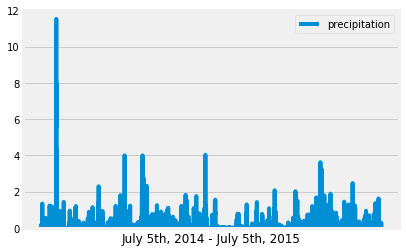

In [14]:
rain_df.plot()
plt.ylim(0,12)
plt.xticks([])
plt.xlabel('July 5th, 2014 - July 5th, 2015')
plt.grid(True)
plt.show()

In [15]:
rain_df.describe()

,precipitation
count,2517.000000
mean,0.140421
std,0.480954
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,11.530000


## Station Analysis

In [16]:
session.query(Measurement.station).\
    distinct(Measurement.station.name).\
    count()

9

In [17]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
temp_query = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date.between('2014-07-05', '2015-07-05')).\
    order_by(Measurement.date).all()

In [20]:
temp_df = pd.DataFrame(temp_query, columns=['precipitation'])
temp_df = temp_df.fillna(0)
temp_df.head()

,precipitation
0,73.0
1,72.0
2,71.0
3,73.0
4,73.0


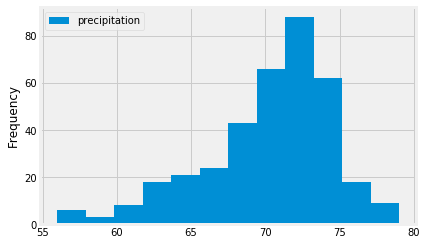

In [21]:
temp_df.plot.hist(bins=12)
plt
plt.show()